# Fitting a single model with drfsc

## Load, fit, predict, and score using drfsc and WDBC example dataset
In this notebook we use the 
Breast Cancer Wisconsin (Diagnostic) Data Set (WDBC) dataset (available from UCI database at 'https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29') to demonstrate how to use the drfsc package and some of its functionality.

This example dataset is quite small, so only a small number of partitions will be used. This can be expanded arbitrarily, based on the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from drfsc import drfsc, utils
from sklearn.model_selection import train_test_split

# Loading data
We start by first loading the dataset available provided in 'data'

In [2]:
data = utils.load_wdbc("data/wdbc/wdbc.data")
print(f"shape: {data.shape}, dimensions: {data.ndim}")

shape: (569, 32), dimensions: 2


As can be seen from the code below, the first column is an ID column (not used), the second column is the label, and the remaining columns are the features. We split the data accordingly.

In [3]:
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302.0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X = data.loc[:, 2:]
X.columns = [f"x_{i}" for i in range(1, X.shape[1] + 1)] # renaming columns
X.head()


,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
corr = X.corr()
display(corr.style.background_gradient(cmap='coolwarm'))

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30
x_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
x_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
x_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
x_4,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
x_5,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
x_6,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
x_7,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
x_8,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
x_9,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
x_10,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [7]:

'''
Calculation how many times a feature was an in high correlation.
Count = 1 denotes only autocorrelation.
'''

df_CorrCount = utils.get_corr_df(X, level=0.8)

display(df_CorrCount)

# col2drop = ['x_1','x_8','x_23','x_24','x_28']
# X = X.drop(columns=col2drop)

,Count
x_1,7.0
x_2,2.0
x_3,7.0
x_4,8.0
x_5,2.0
x_6,6.0
x_7,5.0
x_8,10.0
x_9,1.0
x_10,1.0


In [5]:
Y = data.loc[:, 1]
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 1, dtype: float64

The data then needs to be split into training/validation/testing partitions for use by DRFSC. This is done in the standard way using scikit-learn's train_test_split function.

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train)

To initialize our model, we call the DRFSC class. For this tutorial, we will use 10 iterations (n_runs), and 4 vertical and 2 horizontal partitions (n_vbins and n_hbins respectively). 

In this notebook we show the results for when output = 'single'. This means that we return a single model. The other option is output = 'ensemble', where an ensemble is created based on the number of horizontal partitions.

In [7]:
model = drfsc.DRFSC(n_vbins=4, n_hbins=2, n_runs = 10, output='single', verbose = True)

DRFSC Initialised with parameters: 
             n_vbins = 4, 
             n_hbins = 2, 
             n_runs = 10, 
             redistribute = False, 
             sharing = all, 
             k = 0, 
             output = single, 
             metric = roc_auc, 
             max_processes is 8 
 ------------


To load the data into the DRFSC model, we call the load_data function. This function preprocesses the data. Here, we can specify the degree of polynomial expansion desired (here we use degree=2 (polynomial)).

In [8]:
X_train, X_val, Y_train, Y_val, X_test, Y_test = model.load_data(X_train, X_val, Y_train, Y_val, X_test, Y_test, polynomial=2)

Information for Loaded Data: 
 -------------
'X_train' SHAPE: (364, 496)
          TYPE:  ndarray
'X_val'   SHAPE: (91, 496)
          TYPE:  ndarray
'Y_train' SHAPE: (364,)
          TYPE:  ndarray
'Y_val'   SHAPE: (91,)
          TYPE:  ndarray


If we want to specify some initial mu values for the RFSC optimization, this can be done via the `DRFSC.set_initial_mu()` method. Here, we set the initial mu values to be 0.1 for all features. This is not necessary, and if not specified, the initial mu values will be set to 1/n_features for all features by default.

In [ ]:
model.set_initial_mu(0.1)

We could instead set specific mu values for specific features by passing `DRFSC.set_initial_mu() a dictionary, as shown below.

In [ ]:
model.set_initial_mu({'x_2': 0.2, 'x_3': 0.3, 'x_9': 0.05})

## Model fitting

To fit our DRFSC model, we simply call the fit() method and pass our training and validation data and labels. This will fit the model to the data and return the best model found.

In [9]:
model.fit(X_train, X_val, Y_train, Y_val)

Number of Samples: 364. Horizontal Disitribution SHAPE: (182, 2)
Number of Features: 496. Vertical Distribution SHAPE: (125, 4)
New best model for hbin 0. roc_auc=0.94892 -- Model features [0, 357]
New best model for hbin 1. roc_auc=0.94892 -- Model features [0, 357]
New best model for hbin 1. roc_auc=0.9613 -- Model features [0, 24, 67]
New best model for hbin 0. roc_auc=0.9613 -- Model features [0, 24, 67]
New best model for hbin 0. roc_auc=0.98039 -- Model features [0, 82, 236]
M: {0: {0, 67, 357, 233, 236, 82, 24}, 1: {0, 67, 357, 233, 236, 82, 24}}
New best model for hbin 1. roc_auc=0.97059 -- Model features [0, 357]
M: {0: {0, 24, 67, 357}, 1: {0, 24, 67, 357}}
New best model for hbin 0. roc_auc=0.99123 -- Model features [0, 357, 447]
M: {0: {0, 67, 357, 82, 115, 24, 447}, 1: {0, 67, 357, 82, 115, 24, 447}}
Iter 3. No appreciable improvement over the last 3 iterations in hbin 1
M: {0: {0, 67, 164, 357, 115, 24, 447}, 1: {0, 67, 357, 82, 115, 24, 447}}
Iter 4. No appreciable impro

DRFSC(n_vbins=4, n_hbins=2, n_runs=10, redistribute_features=False, feature_sharing=all, k=0, output=single, metric=roc_auc, verbose=True, polynomial=1, preprocess=True, max_processes=8)

Once a single model has been fit, we can view the features and coefficients of the final model by calling the features_ and coef_ attributes. if the input data is a numpy array and has no feature names, we can instead use the feature_num attribute to access the indicies of the model features

In [25]:
model.features_

['1', 'x_14 x_28', 'x_21 x_27']

In [26]:
model.features_num

[0, 357, 447]

In [23]:
model.coef_

array([ -5.57090728, 120.98243587,  38.95918614])

We can also access the attributes model object itself by calling the `model` attribute.

In [24]:
model.model

After a model has been fit, we can use it to predict labels using the predict_proba() or predict() methods. This function takes our test set data (X_test) as a sole argument, and returns the predicted probabilities and labels respectively.

In [16]:
y_prob = model.predict_proba(X_test)
y_prob

array([0.02736893, 1.        , 0.48383657, 0.99910554, 0.3927719 ,
       0.56075924, 0.99922518, 0.17003767, 0.08309515, 0.16911774,
       0.99999994, 0.02508438, 1.        , 0.21093329, 0.6583395 ,
       0.00989321, 0.98632884, 0.02152639, 0.4888456 , 0.01954708,
       0.00638589, 0.15281358, 1.        , 1.        , 0.99993339,
       0.01241188, 0.01437317, 0.99998213, 0.99999937, 1.        ,
       1.        , 0.18140419, 1.        , 1.        , 0.04653244,
       0.26155145, 0.22643025, 0.01557881, 1.        , 0.99371888,
       0.11251862, 0.20101778, 0.99928074, 0.01937081, 0.47486629,
       0.99999996, 0.15663389, 1.        , 0.00379259, 0.10514351,
       1.        , 1.        , 0.26392025, 0.01358309, 0.27825118,
       0.99999995, 0.04914897, 0.00379259, 0.08909932, 1.        ,
       0.3746837 , 0.85232446, 0.99991508, 0.0051278 , 0.99816116,
       0.07800217, 1.        , 1.        , 0.17168886, 0.99997033,
       0.0126734 , 1.        , 1.        , 0.00444127, 0.05716

In [17]:
y_pred = model.predict(X_test)
y_pred

array([0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.])

# Model Evaluation

To find out how well our model performed, we can use the score() method. This method takes our test set data (X_test) and labels (Y_test) as arguments, and a metric as an optional argument (here we use the default metric, accuracy). It then calculates the metric on the test set, and returns the performance of the model on the test set.

In [18]:
model.score(X_test, Y_test)

{'metric': 'roc_auc', 'score': 0.9966931216931216}

# Model Visualization

To visualize the results, we can use the feature_importance(), pos_neg_prediction(), and single_prediction() methods. 

The feature_importance() method takes no arguments and displays the a histogram of the final model features and their coefficeints.

The pos_neg_prediction method takes as an argument the index of the sample we want to visualize. If we want to visualise a prediction on the test set, the test set should also be passed as an argument. This method displays the positive and negative predictions for the sample, computed by multiplying the data by the model coefficients and separating the positive and negative contributions.
- E.g. usage: pos_neg_prediction(0, X_test) for visualising the prediction on the first sample in the test set.

The single_prediction() method takes the same arguments as pos_neg_prediction(), and diplays the model coefficients weighted by the data for the sample. This is useful for visualising the model's prediction on a single sample.
- E.g. usage: single_prediction(0, X_test) for visualising the prediction on the first sample in the test set.

<BarContainer object of 3 artists>

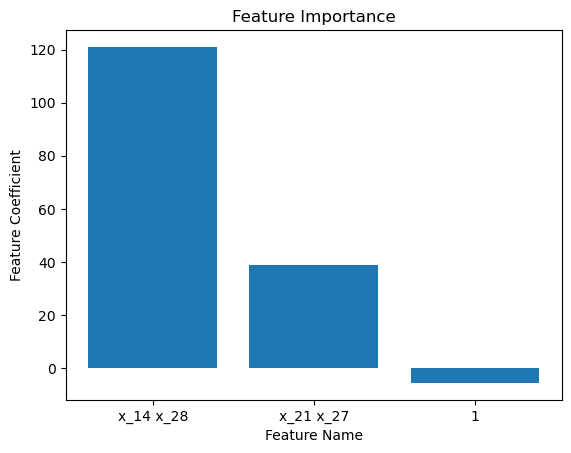

In [19]:
model.feature_importance()

<BarContainer object of 2 artists>

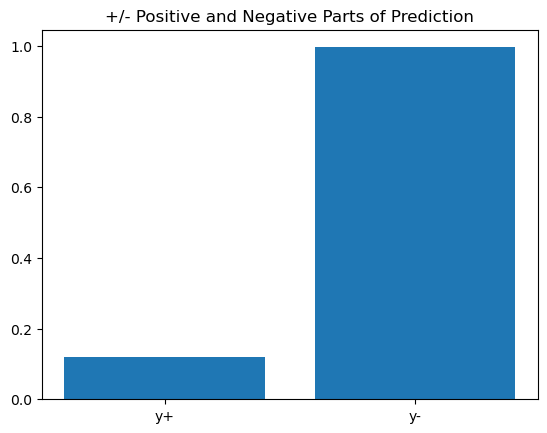

In [20]:
model.pos_neg_prediction(0, X_test)

<BarContainer object of 3 artists>

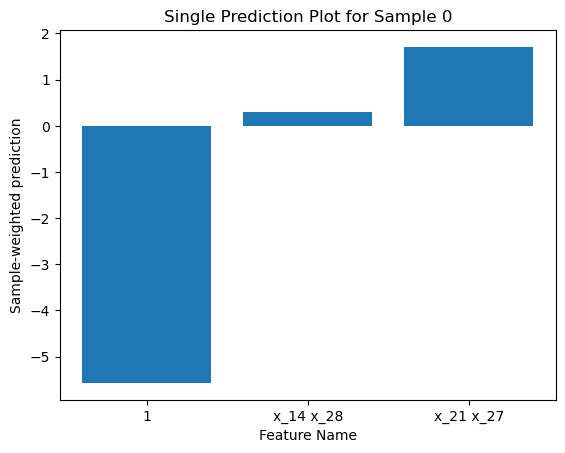

In [21]:
model.single_prediction(0, X_test)